PROBLEM STATEMENT: Classify if an individual is demented or not. 

By: Prem S Rajanampalle, REI Intercollege, Dayalbagh, Agra

The dataset link: https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers

# Table of Contents:
1. Data Description 
2. EDA 
3. Data Preprocessing 
4. Split into training and testing 
5. KNN
6. Logistic Regression 
7. Decision Trees 
8. Naive Bayes 
9. XGBoost 
10. Random Forests

## Data description

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
ds = pd.read_csv("oasis_longitudinal.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [4]:
ds.shape

(373, 15)

In [5]:
ds.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


Creating a new dataset where "visit" is "1". 

In [6]:
ds_new1 = ds[ds['Visit']==1]
ds_new1.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [7]:
ds_new1.shape

(150, 15)

## EDA

array([[<Axes: title={'center': 'Visit'}>,
        <Axes: title={'center': 'MR Delay'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'EDUC'}>,
        <Axes: title={'center': 'SES'}>,
        <Axes: title={'center': 'MMSE'}>],
       [<Axes: title={'center': 'CDR'}>,
        <Axes: title={'center': 'eTIV'}>,
        <Axes: title={'center': 'nWBV'}>],
       [<Axes: title={'center': 'ASF'}>, <Axes: >, <Axes: >]],
      dtype=object)

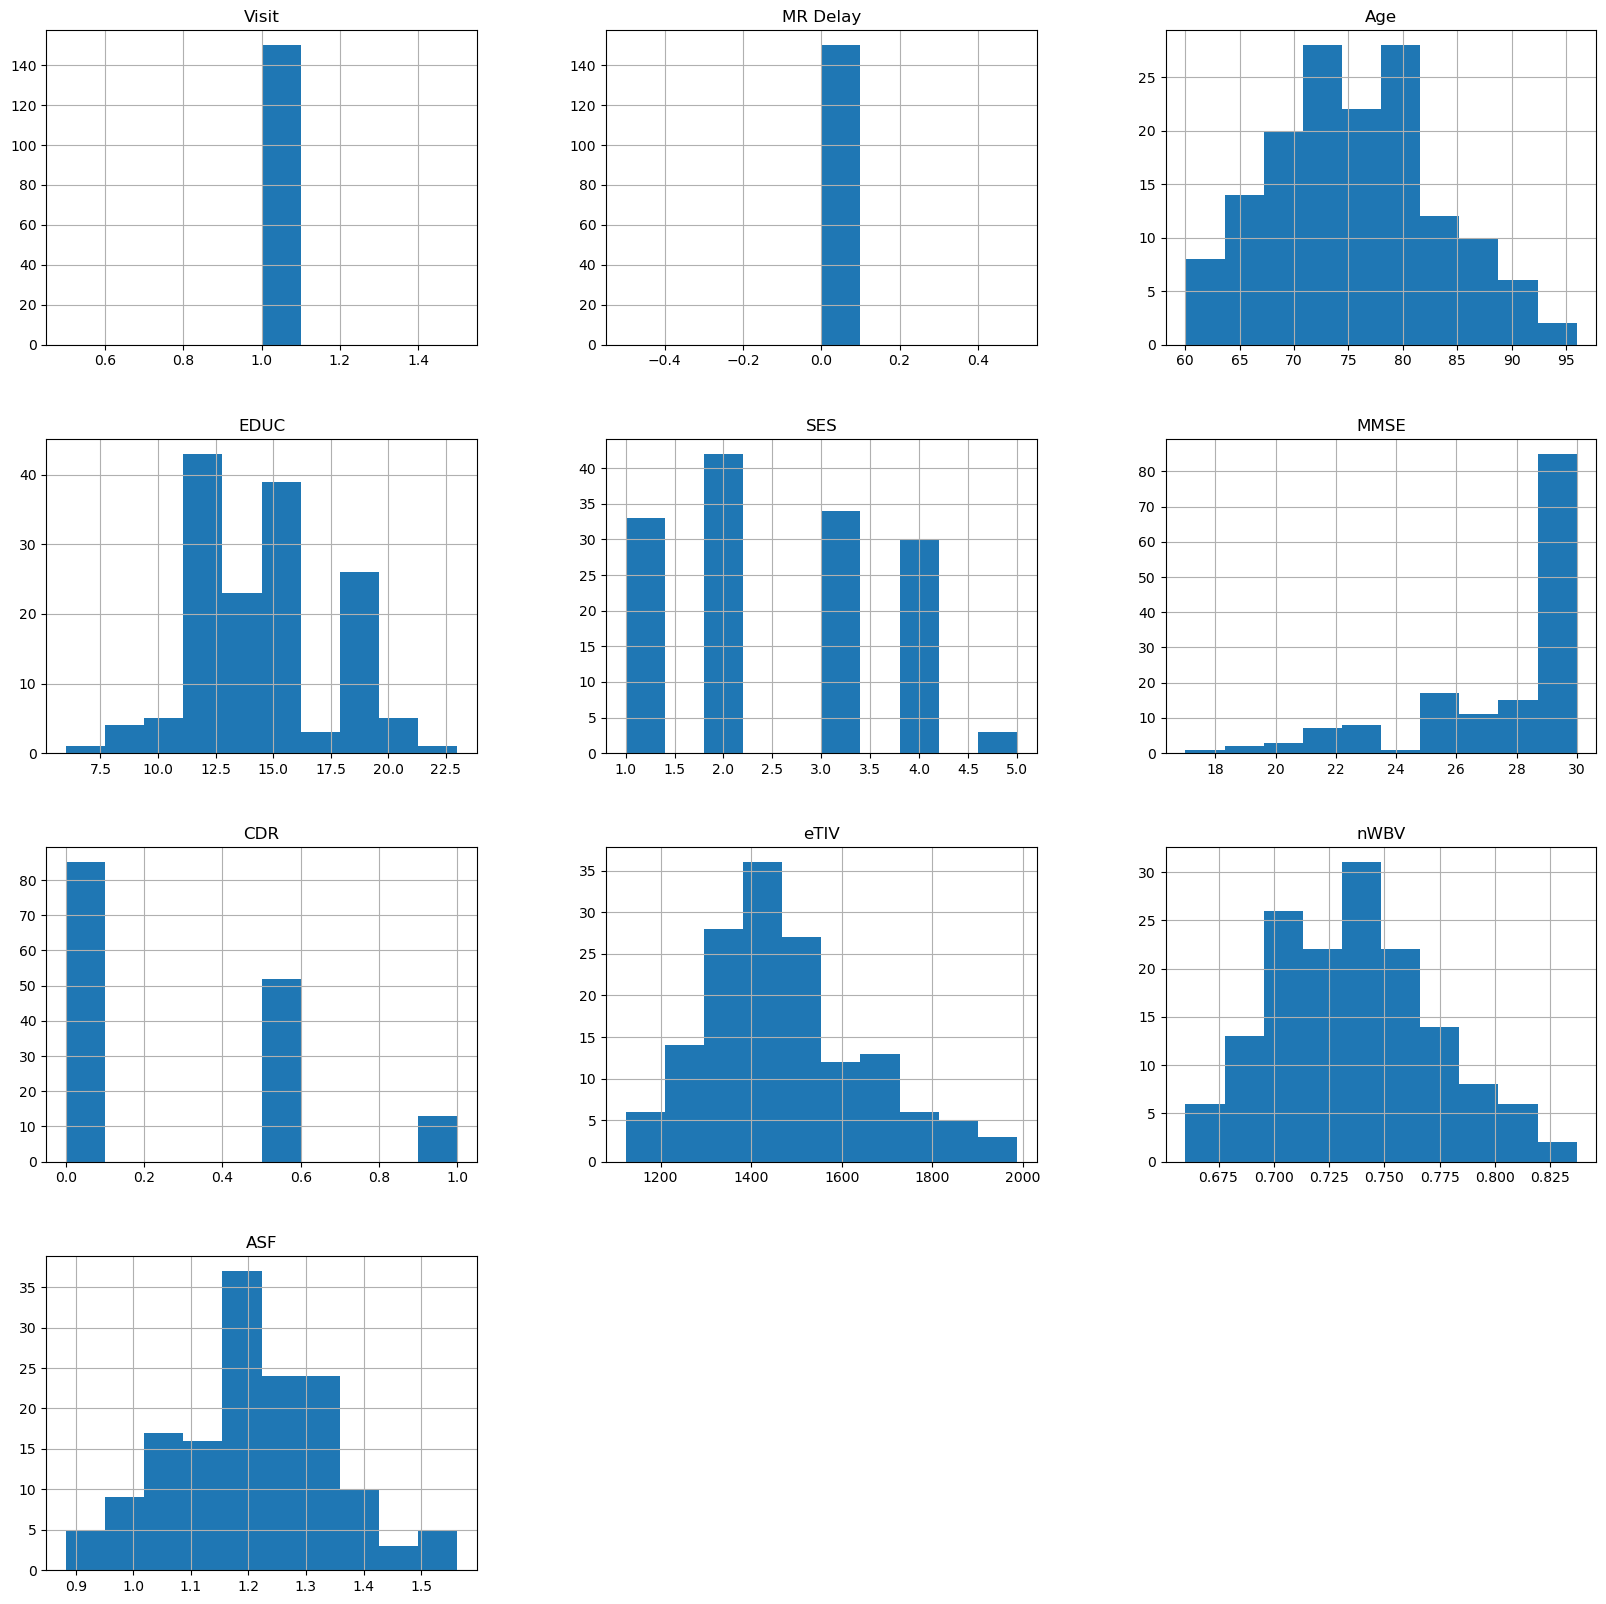

In [8]:
ds_new1.hist(figsize = (20, 20))

In [9]:
ds_new1.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_7920\3886132498.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds_new1.corr()


,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Visit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MR Delay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,1.000000,-0.065513,-0.016734,-0.022629,-0.039313,-0.009693,-0.558027,0.020708
EDUC,NaN,NaN,-0.065513,1.000000,-0.725770,0.216439,-0.227556,0.236263,0.048484,-0.218819
SES,NaN,NaN,-0.016734,-0.725770,1.000000,-0.180484,0.137950,-0.244047,0.028227,0.235480
MMSE,NaN,NaN,-0.022629,0.216439,-0.180484,1.000000,-0.691874,-0.051549,0.322025,0.059661
CDR,NaN,NaN,-0.039313,-0.227556,0.137950,-0.691874,1.000000,0.037608,-0.310813,-0.039840
eTIV,NaN,NaN,-0.009693,0.236263,-0.244047,-0.051549,0.037608,1.000000,-0.195254,-0.988228
nWBV,NaN,NaN,-0.558027,0.048484,0.028227,0.322025,-0.310813,-0.195254,1.000000,0.190626
ASF,NaN,NaN,0.020708,-0.218819,0.235480,0.059661,-0.039840,-0.988228,0.190626,1.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_7920\2373687958.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(ds.corr(), annot = True)


<Axes: >

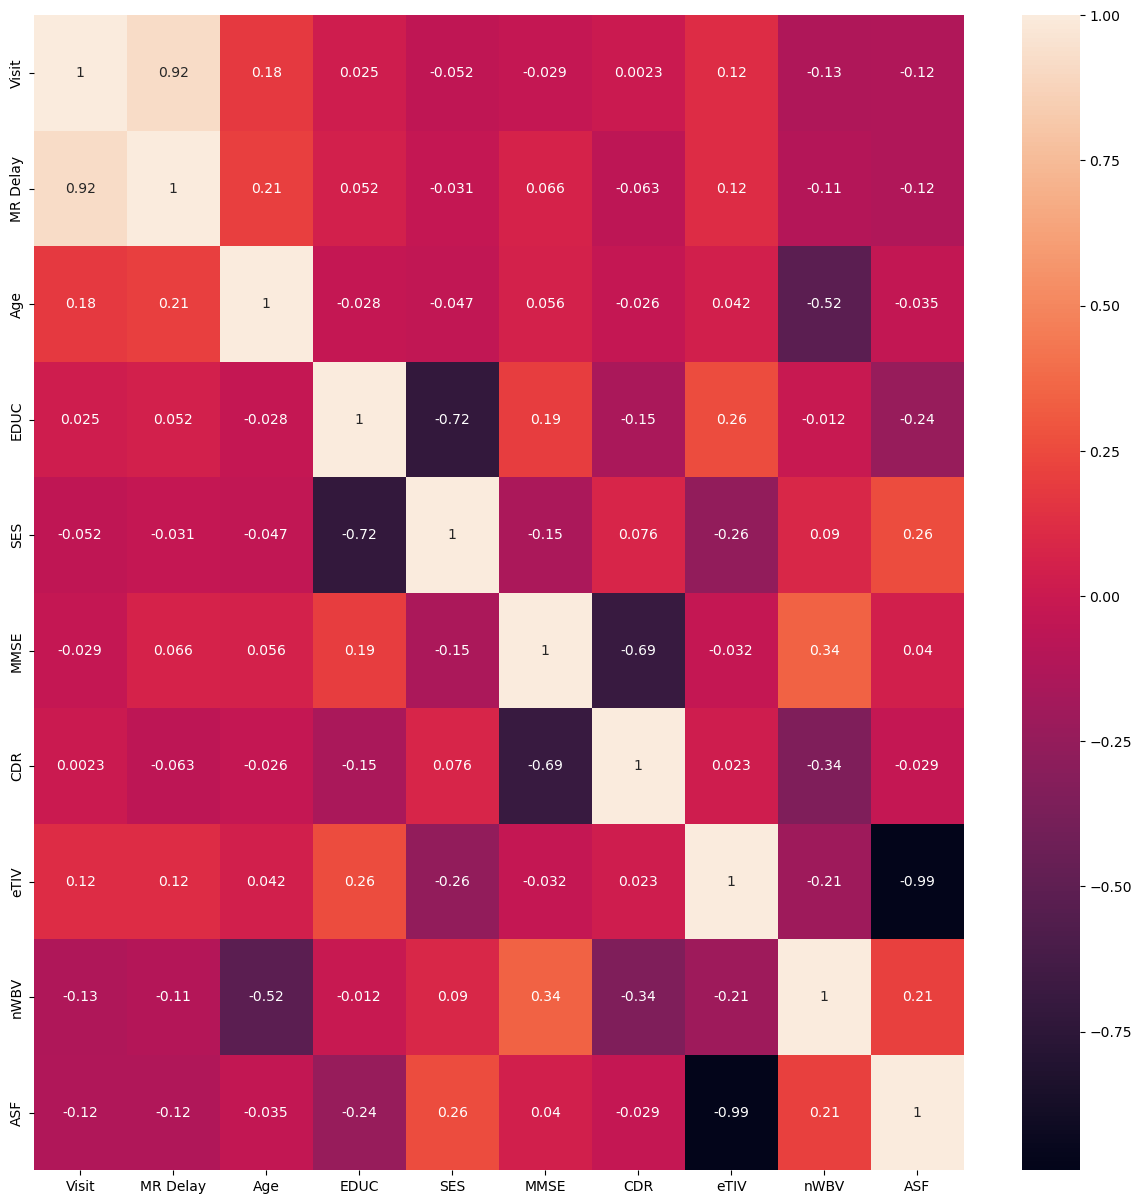

In [12]:
plt.figure(figsize = (15, 15))
sb.heatmap(ds.corr(), annot = True)

## Preprocessing 

#### Removing Unnecessary columns in the dataset: 

In [13]:
# Removing unnecessary columsn in the dataset:
drop_list = ["Subject ID", "MRI ID", "Visit", "MR Delay", "Hand", "ASF"]
ds_new1 = ds_new1.drop(drop_list, axis = 1)

In [14]:
ds_new1.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736
5,Nondemented,F,88,18,3.0,28.0,0.0,1215,0.710
7,Nondemented,M,80,12,4.0,28.0,0.0,1689,0.712
10,Demented,M,71,16,NaN,28.0,0.5,1357,0.748


In [15]:
ds_new1.shape

(150, 9)

In [10]:
# Dropping mf columns
#ds_mf = ds_new1['M/F']

In [17]:
# Checking for missing values. 
ds_new1.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      8
MMSE     0
CDR      0
eTIV     0
nWBV     0
dtype: int64

There are 8 missing values in SES column. We neet to use imputing. But we are going to do that later... just for the independent variables. 

#### Encoding
We are going to perform the following actions:
1. In Group column: we are going to replace demented with 1 and everything else 0. 
2. In M/F column: we are going to replace male with 1 and everything else 0

In [15]:
ds_new1['Group'] = ds_new1['Group'].apply(lambda x:1 if x == "Demented" else 0)
ds_new1['M/F'] = ds_new1['M/F'].apply(lambda x: 1 if x == "Male" else 0)

## Splitting the dataset

#### Into Dependent and Independent variable

In [16]:
# Dependent and independent variable splitting 
X = ds_new1[["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "CDR"]]
y = ds_new1["Group"]

In [17]:
X

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,CDR
0,0,87,14,2.0,27.0,1987,0.696,0.0
2,0,75,12,NaN,23.0,1678,0.736,0.5
5,0,88,18,3.0,28.0,1215,0.710,0.0
7,0,80,12,4.0,28.0,1689,0.712,0.0
10,0,71,16,NaN,28.0,1357,0.748,0.5
...,...,...,...,...,...,...,...,...
359,0,73,12,NaN,23.0,1661,0.698,0.5
361,0,66,13,2.0,30.0,1495,0.746,0.0
365,0,72,16,3.0,24.0,1354,0.733,0.5
367,0,80,16,1.0,28.0,1704,0.711,0.5


#### Imputing the independent variable

In [18]:
# Imputing on X value
X = X.fillna(X.median())
X

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,CDR
0,0,87,14,2.0,27.0,1987,0.696,0.0
2,0,75,12,2.0,23.0,1678,0.736,0.5
5,0,88,18,3.0,28.0,1215,0.710,0.0
7,0,80,12,4.0,28.0,1689,0.712,0.0
10,0,71,16,2.0,28.0,1357,0.748,0.5
...,...,...,...,...,...,...,...,...
359,0,73,12,2.0,23.0,1661,0.698,0.5
361,0,66,13,2.0,30.0,1495,0.746,0.0
365,0,72,16,3.0,24.0,1354,0.733,0.5
367,0,80,16,1.0,28.0,1704,0.711,0.5


#### Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [20]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

105
45
105
45


#### Feature Scalling

In [21]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[ 0.        ,  1.80140583,  1.33969737, -0.40471361,  0.92299307,
         1.37268888,  0.3203382 , -0.94064699],
       [ 0.        , -0.80094609,  0.54120225,  0.55381862,  0.60593438,
        -0.61647625,  2.37162668, -0.94064699],
       [ 0.        ,  1.28093544,  1.33969737, -1.36324583,  0.60593438,
        -1.30526179, -0.9441547 , -0.94064699],
       [ 0.        ,  0.89058266,  0.14195469,  0.55381862,  0.60593438,
         0.09012271, -1.2813528 ,  0.68739588],
       [ 0.        , -0.28047571,  0.14195469,  1.51235085,  0.60593438,
        -1.25775934, -1.05655406, -0.94064699],
       [ 0.        ,  0.76046506, -0.65654043, -0.40471361,  0.60593438,
        -0.82429947,  0.06743962, -0.94064699],
       [ 0.        , -1.71176926, -1.05578799,  1.51235085, -3.19876987,
         0.24450567, -0.07305959,  0.68739588],
       [ 0.        ,  0.50022987,  1.33969737, -0.40471361,  0.60593438,
         0.93329121, -1.11275375, -0.94064699],
       [ 0.        , -0.28047571

## Model Building

#### KNN Classifier 

In [22]:
# KNN Model 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)

In [23]:
knn_model.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)

C:\Users\pavit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
y_pred_knn

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.56      0.65      0.60        23
           1       0.56      0.45      0.50        22

    accuracy                           0.56        45
   macro avg       0.56      0.55      0.55        45
weighted avg       0.56      0.56      0.55        45



#### Logistic Regression 

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_log = lr.predict(X_test)

C:\Users\pavit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
y_pred_log

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        23
           1       0.95      0.82      0.88        22

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



#### Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
y_pred_nb = nb_model.fit(X_train, y_train).predict(X_test)

In [30]:
y_pred_nb

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.96      1.00      0.98        22

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### Decision Trees Classifer

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth = 6, random_state = 0)
y_pred_dt = dt_model.fit(X_train, y_train).predict(X_test)

In [58]:
y_pred_dt

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0], dtype=int64)

In [59]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.96      1.00      0.98        22

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### Ensembling Methods - Bagging - Random Forests Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, random_state = 0, max_depth = 170)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [36]:
y_pred_rf

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.96      1.00      0.98        22

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### Boosting - XGBoost 

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.01, random_state = 0)
y_pred_xgb = xgb.fit(X_train, y_train).predict(X_test)

In [39]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.96      1.00      0.98        22

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### Boosting - AdaBoost 

In [40]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 0, n_estimators = 100, learning_rate=0.01)
y_pred_ada = ada.fit(X_train, y_train).predict(X_test)

In [44]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.96      1.00      0.98        22

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### Support Vector Machines Classifier 


In [47]:
from sklearn import svm
svm_model = svm.SVC(kernel = 'linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [49]:
y_pred_svm = svm_model.predict(X_test)
y_pred_svm

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0], dtype=int64)

In [50]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.96      1.00      0.98        22

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

